<div class="alert alert-info">
    <h1 align="center">Linear Regression</h1> 
    <h3 align="center"> Machine Learning Course (Fall 2020)</h3>
    <h5 align="center">Mahmoud Ghazi [ML2020]</h5>
</div>

In [1]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np

#### Predict the price of house(y) according to independance variable(x) is a simple problem of linear regression
* dependant variable(y) is continuous ...

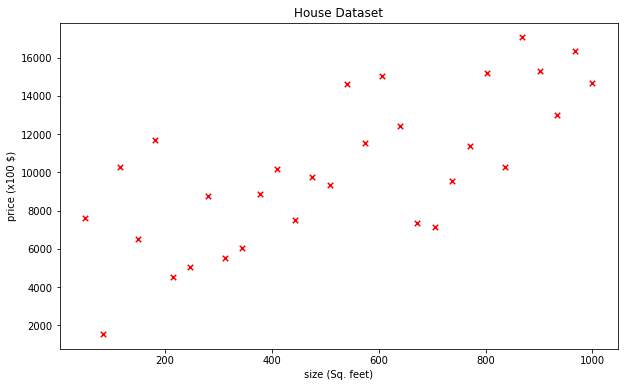

In [2]:
# rand(d0, d1, …, dn)	Random values in a given shape.
# randn(d0, d1, …, dn)	Return a sample (or samples) from the “standard normal” distribution.
# randint(low[, high, size, dtype])	Return random integers from low (inclusive) to high (exclusive).
# random_integers(low[, high, size])	Random integers of type np.int between low and high, inclusive.
# random_sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# random([size])	Return random floats in the half-open interval [0.0, 1.0).
# ranf([size])	Return random floats in the half-open interval [0.0, 1.0).
# sample([size])	Return random floats in the half-open interval [0.0, 1.0).
# choice(a[, size, replace, p])	Generates a random sample from a given 1-D array
# bytes(length)	Return random bytes.
num = 30                                                              
x = np.linspace(50,1000,num=num)
y = 10*x  +  np.random.uniform(low=0, high=10000, size=(num,))

plt.figure(figsize=(10, 6))
plt.scatter(x, y, s=30, c='r', marker='x')
plt.xlabel('size (Sq. feet)')
plt.ylabel('price (x100 $)')
plt.title('House Dataset')
plt.show()

#### The simplest hypothesis for linear regression

## $$ h_\theta(x) = \theta_0 + \theta_1 x $$
* $ \theta_0 , \theta_1 $ are parameters which $ \theta_0 $ is intercept and $ \theta_1 $ is slope 
*we suppose x and y by random function

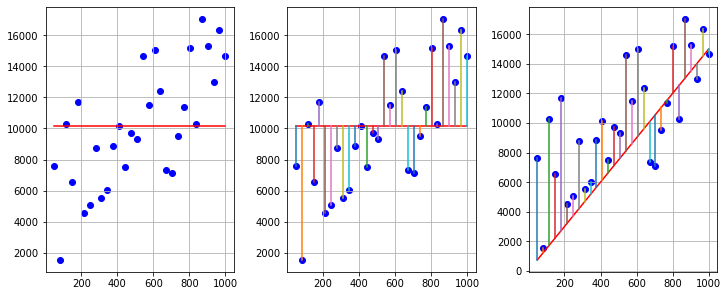

In [3]:
y_1 = np.ones_like(y) * y.mean()

fig = plt.figure(constrained_layout=True, figsize=(10,4))
grid = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(grid[0,0])
ax1 = fig.gca()
ax1.scatter(x,y,c='b');
ax1.plot(x,  y_1, color='r');
plt.grid()

ax2 = fig.add_subplot(grid[0,-2])
ax2.scatter(x,y,c='b');
ax2.plot(x,  y_1, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_1[i]))
plt.grid()

y_2 = 15*x
ax3 = fig.add_subplot(grid[0,-1])
ax3.scatter(x,y,c='b');
ax3.plot(x,  y_2, color='r');
for i in range(x.shape[0]):
    plt.plot((x[i],x[i]),(y[i],y_2[i]))
plt.grid()

#### Error for one sample is the distance between each dot to line:    $ h_\theta(x) - y_i $
<font color="blue">  <b>COST FUNCTION</b> (Sumation of all squared errors) : </font>
### $$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2 $$

#### Lets draw the cost function

if  $ \theta_0=0 $

Then we have : $ h_\theta(x) = \theta_1 x_i $

if we calculate the cost function $\frac{1}{2}\sum_{i=1}^n(\theta_1 x_i  - y_i)^2 $ for different $\theta_1 $ and plot it, we have:

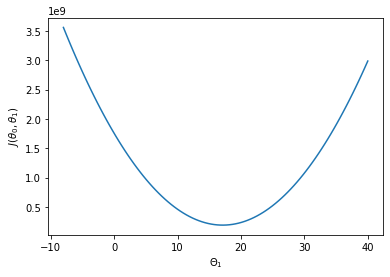

In [4]:
# Randomly determine theta_1
j=[]
theta_1=[]
theta = np.linspace(-8,40,num=100)
for t in theta:
    a = 0.5*np.sum((t*x - y)**2)
    j.append(a)
    theta_1.append(t)

plt.plot(theta_1,j)
plt.xlabel(r'$\Theta_1$')
plt.ylabel(r'$J(\theta_0,\theta_1)$');

In [5]:
# calculate hypothesis
def h(tet0, tet1, x):  
    return tet0 + tet1 * x

#calculate mean squared error
def mse(y_pred, y_true):
    return 0.5 * ((y_pred - y_true) ** 2).mean()

### Normalization

In [6]:
mu = x.mean()
sigma = x.std()
xn = (x - mu) / sigma  # normalization
# print(xn)

## Goal
#### Above figure turn to a 3-dimension plate if $\theta_0$ was determined (the figure of 3d plate will be shown later in this project). In order to find a best hypothesis(line) we should minimize the cost function.
#### for minimizing the cost function we should find the best parameters

### $$minimize  J(\theta_0 , \theta_1)$$

## <font color='blue'>Gradient descent</font>
After Randomly determine $\theta_0 , \theta_1$  and calculate cost function, Now we should find a direction to move and minimize this function. This direction explain with gradient in math.

$$
\nabla J_\theta=\left[\begin{array}{c}
\dfrac{\partial J}{\partial \theta_0}\\
\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$
we should move against this direction $ (-\nabla)$

## <font color='blue'>Updating</font>
### $$\theta_(new) = \theta_(old) + \alpha(-\nabla J_\theta)$$
$\alpha$ is step size. it is called hyperparameter and is a viatal learning rate

$$
\left[\begin{array}{c}
\theta_0 \\
\theta_1 
\end{array}\right]=\left[\begin{array}{c}
\theta_0\\
\theta_1  
\end{array}\right] + \alpha
\left[\begin{array}{c}
-\dfrac{\partial J}{\partial \theta_0}\\
-\dfrac{\partial J}{\partial \theta_1}  
\end{array}\right]
$$

#### we can write J partial derivative in this way
for J=0
$$  
\theta_0 = \theta_0 - \alpha \dfrac{\partial}{\partial \theta_0}J(\theta_0 , \theta_1)
$$

for J=1
$$  
\theta_1 = \theta_1 - \alpha \dfrac{\partial}{\partial \theta_1}J(\theta_0 , \theta_1)
$$

##### Instead of $J(\theta_0 , \theta_1)$ we can put each functions that dependant to $\theta_0 , \theta_1$ and the output will be minimum
we also had this:
$$ J(\theta_0 , \theta_1)=  \frac{1}{2}\sum_{i=1}^n(h_\theta(x_i) - y_i)^2$$
##### with considering $ h_\theta(x) = \theta_0 + \theta_1 x $ and after partial derivative we have:
for J=0
### $$  
\theta_0 = \theta_0 - \alpha \sum_{i=1}^n h_\theta(x_i) - y_i
$$

for J=1
### $$  
\theta_1 = \theta_1 - \alpha \sum_{i=1}^n (h_\theta(x_i) - y_i) x_i
$$
### $\theta_0 and \theta_1$ should be synchoronized their update, if we update it by sequence the result will be wrong
### we continue repeating the calculation of $\theta_0 and \theta_1$ untill we reach convergence, it means that the differece of cost functions $J(\theta)$ after a repeat reach below 0.001 

In [7]:

# initialize parameters randomly
theta_0 = np.random.randn() 
theta_1 = np.random.randn()

print("Initial guess:")
print(" theta_0 = %.4f\n theta_1 = %.4f" %(theta_0, theta_1))

# costs = []

def update_step(theta_0,theta_1,alpha):
#     global theta_0, theta_1, costs
    
    # predict 
    y_pred = h(theta_0, theta_1, xn)
    costs = mse(y_pred, y)
    
    # compute gradients
    dtheta_0 = (y_pred - y)
    dtheta_1 = xn * dtheta_0
    
    # update parameters
    theta_0 -= alpha * dtheta_0.mean()
    theta_1 -= alpha * dtheta_1.mean()
    
    return theta_0,theta_1,costs


Initial guess:
 theta_0 = -0.8607
 theta_1 = 0.1043


In [8]:
# in order to find the best alpha we should repeat the algorithm for several times
choose_alpha = .0001
alpha_range=[]
while choose_alpha<10000:
    alpha_range.append(choose_alpha)
    al = choose_alpha*3
    choose_alpha = round(al,5)
print(len(alpha_range),alpha_range)
    

17 [0.0001, 0.0003, 0.0009, 0.0027, 0.0081, 0.0243, 0.0729, 0.2187, 0.6561, 1.9683, 5.9049, 17.7147, 53.1441, 159.4323, 478.2969, 1434.8907, 4304.6721]


In [9]:
def set_axs(axs,N):
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

alpha_cost=[]
for alpha in alpha_range:
    cnt=0
    t0,t1 = theta_0,theta_1
    costs=[]
    thetas_cost=[]
    while cnt<1000:
        for i in range(100): 
            t0,t1,cost = update_step(t0,t1,alpha)
            costs.append(cost)
        thetas_cost.append([t0,t1,cost])
        diff = costs[-2] - costs[-1]
    #     print(deff)
        cnt+=1

        if diff < .001:
            print(diff,f'in {cnt}*100 time it reach the minimum')
            break
    a = np.array(thetas_cost)
#     print(a.shape)
#     if  write code to prevent encountering overflow !!!!!!!!!!!!!!!!!!!!!
    alpha_cost.append((alpha,costs))

0.0009939386509358883 in 811*100 time it reach the minimum
0.0009718453511595726 in 289*100 time it reach the minimum
0.0008749482221901417 in 103*100 time it reach the minimum
0.00061425706371665 in 37*100 time it reach the minimum
0.0006014257669448853 in 13*100 time it reach the minimum
6.04153610765934e-05 in 5*100 time it reach the minimum
7.422640919685364e-07 in 2*100 time it reach the minimum
-9.313225746154785e-10 in 1*100 time it reach the minimum
0.0 in 1*100 time it reach the minimum
2.5109853595495224e-05 in 4*100 time it reach the minimum
-2.931697542992966e+144 in 1*100 time it reach the minimum
-8.179911633917473e+249 in 1*100 time it reach the minimum


/home/mahmood/project/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-5-1f88816f9198>:7: RuntimeWarning: overflow encountered in square
  return 0.5 * ((y_pred - y_true) ** 2).mean()
<ipython-input-9-d613594f8568>:18: RuntimeWarning: invalid value encountered in double_scalars
  diff = costs[-2] - costs[-1]
<ipython-input-7-6cd1aeb96778>:19: RuntimeWarning: overflow encountered in multiply
  dtheta_1 = xn * dtheta_0
/home/mahmood/project/myenv/lib/python3.8/site-packages/numpy/core/_methods.py:151: RuntimeWarning: invalid value encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
<ipython-input-5-1f88816f9198>:3: RuntimeWarning: invalid value encountered in add
  return tet0 + tet1 * x
<ipython-input-7-6cd1aeb96778>:22: RuntimeWarning: overflow encountered in double_scalars
  theta_0 -= alpha * dtheta_0.mean()
<ipython-input-7-6cd1aeb96778>:23: 

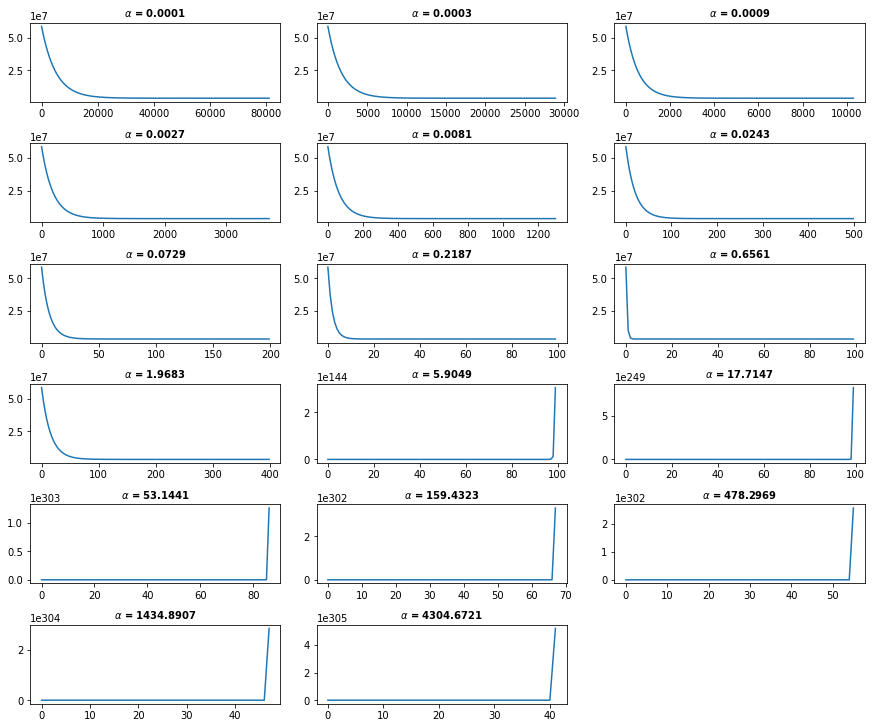

In [10]:
   
plot_number = len(alpha_cost)
fig, axs = plt.subplots(6,3, figsize=(12,10), constrained_layout=True)
axs = set_axs(axs,plot_number)
for alpha,ax in zip(alpha_cost,axs):
    ax.plot(alpha[1])
    ax.set_title(r'$\alpha$ = {}'.format(alpha[0]),fontweight='bold',size=10)

### The descent ternd in cost function plot shows wev'e been on a right path and the <font color='red'>learning rate $(\alpha)$ </font>was suitable because by repeating the algorithm the cost has benndecreased.
### in order to find a right hyperparameter $\alpha$ we should first consider a value for it and then repeat all process untill this step and increase and decrease it according to output plot.

### we can see that in $\alpha = 0.0081 $ we reach convergence with a good slope

## Important point
In linear regression if we use gradient descent algorithem and we reach convergence, be insure that we have one global optimum because our cost function is convex.

### Animate

In [11]:
from matplotlib import animation, rc
rc('animation', html='html5')
fig = plt.figure(dpi=100, figsize=(5, 3))

# plot data
plt.scatter(xn, y, s=30, marker='x')

# plot prediction (a line)
y_pred = h(theta_0, theta_1, xn)
line, = plt.plot(xn, y_pred, 'k')
plt.close()

t0,t1 = theta_0,theta_1
def animate(i):
    global t0,t1 
    line.set_ydata(h(t0, t1, xn))
    for i in range(100): 
        t0,t1,cost = update_step(t0,t1,alpha= 0.0081)
    return line

anim = animation.FuncAnimation(fig, animate, np.arange(0, 21), interval=200, repeat_delay=1000)

In [12]:
anim

In [41]:
print(" theta_0 = %7.2f\n theta_1 = %7.2f" %(theta_0, theta_1))


 theta_0 =   -0.34
 theta_1 =    0.22


## Prediction

In [13]:
x_test = 1750

In [14]:
x_test_n = (x_test - mu) / sigma

In [15]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [16]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [17]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [18]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [19]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [20]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [21]:
y_test = h(theta_0, theta_1, x_test_n)
print("For size = {}, predicted price = {:.2f} $".format(x_test, y_test))

For size = 1750, predicted price = 0.61 $


In [22]:
x = np.array([1, 2, 3])
d  =np.broadcast_to(a[:,2], (20,20))

In [23]:
a[:,1].min()

1183.5682033483497

In [24]:
# X, Y = np.meshgrid(xn, y_pred)
X, Y = np.meshgrid(a[:,0], a[:,1])
# X, Z = np.meshgrid(a[:,0], a[:,2])
# Z
# print(X)

In [25]:
Z = d
# def fun(x, y):
#     return x**2 + y**2
# zs = np.array(fun(np.ravel(X), np.ravel(Y)))
# Z = zs.reshape(X.shape)
# Z.shape

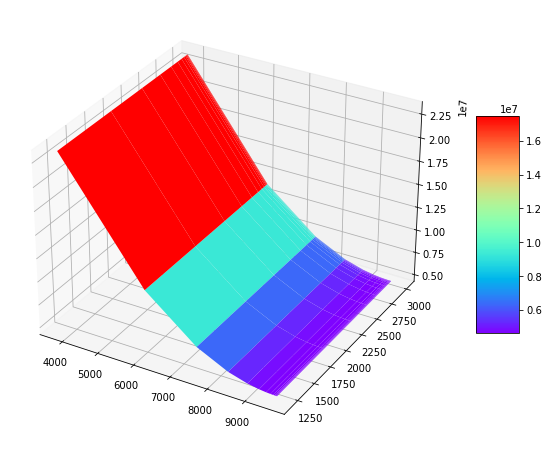

In [26]:
fig = plt.figure(figsize=(12, 8))
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, cmap=plt.cm.rainbow)
fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [27]:
k=[]
vv=[]
theta = np.linspace(5,25,num=100)
c = np.ones_like(x)
for i in theta:
    a = 0.5*np.sum((i*c-y)**2)
    k.append(a)
    vv.append(i)

ValueError: operands could not be broadcast together with shapes (3,) (30,) 

In [ ]:
plt.plot(v,k)
plt.xlabel('Theta_2')
plt.ylabel('cost Function  J(theta)');